<b>imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<b>file reading - Bruker

In [2]:
source = "Bruker"

path_label = "20230531_CVD_3158"

input_file = open("./" + path_label + "_map/" + path_label + "_60s_10x10pts_roi_net_sum.txt", "r")

sample_name = "CVD" + path_label[-4:]

#dat_xx_dx are 10x10 arrays
dat_si_d1 = np.zeros((10, 10))
dat_ga_d1 = np.zeros((10, 10))

dat_si_d2 = np.zeros((10, 10))
dat_ga_d2 = np.zeros((10, 10))

ga_si_d1 = np.zeros((10, 10))
ga_si_d2 = np.zeros((10, 10))

#how this works: readline returns a single empty string ONLY IF the EOF is reached
s = input_file.readline().split(" ")
while s != [""]:

    if s[0][0] == "2": #check if it's a line containing data
        
        while "" in s:
        #cut empty strings out of s
            for j in range(0, len(s)):
                if s[j] == "":
                    del s[j]
                    break #you can only delete one element per pass because len(s) changes when you delete an element,
                          #and the loop needs to be re-run
                
        x = int(s[0][-3]) #x is the slower changing index
        y = int(s[0][-1]) #y is the most rapidly changing index
        si_counts = float(s[1])
        ga_counts = float(s[6])
        if s[0][-5] == "1": #separate into detector 1 and detector 2
            dat_si_d1[x][y] = si_counts
            dat_ga_d1[x][y] = ga_counts
            ga_si_d1[x][y] = ga_counts/si_counts
        elif s[0][-5] == "2":
            dat_si_d2[x][y] = si_counts
            dat_ga_d2[x][y] = ga_counts
            ga_si_d2[x][y] = ga_counts/si_counts
               
    s = input_file.readline().split(" ")
        
input_file.close()

In [3]:
input_file = open("./" + path_label + "_map/" + path_label + "_60s_10x10pts_roi_bg_sum.txt", "r")

#dat_xx_dx are 10x10 arrays
bdat_si_d1 = np.zeros((10, 10))
bdat_ga_d1 = np.zeros((10, 10))

bdat_si_d2 = np.zeros((10, 10))
bdat_ga_d2 = np.zeros((10, 10))

#how this works: readline returns a single empty string ONLY IF the EOF is reached
s = input_file.readline().split(" ")
while s != [""]:

    if s[0][0] == "2": #check if it's a line containing data
        
        while "" in s:
        #cut empty strings out of s
            for j in range(0, len(s)):
                if s[j] == "":
                    del s[j]
                    break #you can only delete one element per pass because len(s) changes when you delete an element,
                          #and the loop needs to be re-run
                
        x = int(s[0][-3]) #x is the slower changing index
        y = int(s[0][-1]) #y is the most rapidly changing index
        si_counts = float(s[1])
        ga_counts = float(s[6])
        if s[0][-5] == "1": #separate into detector 1 and detector 2
            bdat_si_d1[x][y] = si_counts
            bdat_ga_d1[x][y] = ga_counts
        elif s[0][-5] == "2":
            bdat_si_d2[x][y] = si_counts
            bdat_ga_d2[x][y] = ga_counts
               
    s = input_file.readline().split(" ")
        
input_file.close()

In [4]:
#vec_xx_dx are vectors containing the data in no particular order
dat_si_d1 = dat_si_d1 - bdat_si_d1
dat_si_d2 = dat_si_d2 - bdat_si_d2
dat_ga_d1 = dat_ga_d1 - bdat_ga_d1
dat_ga_d2 = dat_ga_d2 - bdat_ga_d2

vec_si_d1 = dat_si_d1.reshape(100)
vec_si_d2 = dat_si_d2.reshape(100)
vec_ga_d1 = dat_ga_d1.reshape(100)
vec_ga_d2 = dat_ga_d2.reshape(100)

def getStats(ar):
    """calculate and return the follwing statistical properties of ar:
    average
    standard deviation
    average, with 5 highest and lowest points removed
    standard deviation, with 5 highest and lowest points removed

    ar must be a 1d array
    """
    av = np.average(ar)
    std = np.sqrt(np.sum((ar-av)**2)/ar.size)

    trim = np.sort(ar)[5:-5]

    av_trim = np.average(trim)
    std_trim = np.sqrt(np.sum((trim-av_trim)**2)/trim.size)

    return av, std, av_trim, std_trim

avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1 = getStats(vec_si_d1)
avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2 = getStats(vec_si_d2)

avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1 = getStats(vec_ga_d1)
avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2 = getStats(vec_ga_d2)

avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1 = getStats(vec_si_d1)
avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2 = getStats(vec_si_d2)

avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1 = getStats(vec_ga_d1)
avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2 = getStats(vec_ga_d2)

print(sample_name + " Statistics, " + source)
print("\t\t\t\ttrimmed\ttrimmed")
print("Signal\tDet.\tAvg\tSTD\tavg\tstd")
print("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1))
print("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2))
print("Ga\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1))
print("Ga\td2\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2))


CVD3158 Statistics, Bruker
				trimmed	trimmed
Signal	Det.	Avg	STD	avg	std
Si	d1	340220	1161	340272	812
Si	d1	354362	1349	354455	961
Ga	d1	15116	119	15114	95
Ga	d2	15549	132	15551	106


<b>Generate probability plots

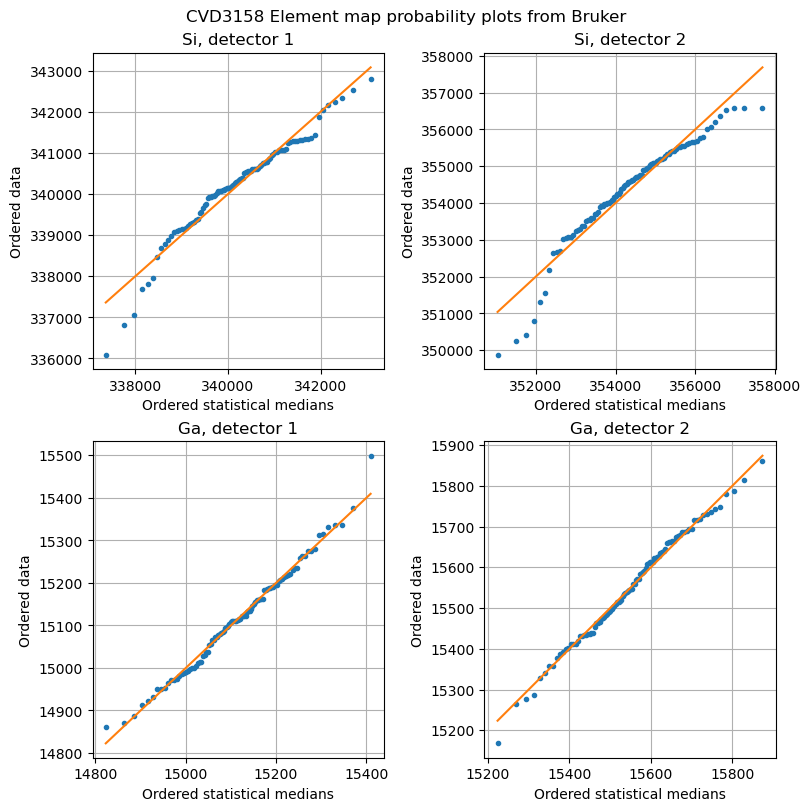

In [5]:
def probPlot(ax, dat, avg, std, title):
    osm, osr = stats.probplot(dat, (avg, std), dist="norm", fit=False)
    ax.plot(osm, osr, ".") #plot data
    ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, ((ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=2, ncols = 2, figsize = (8, 8), layout="constrained")

probPlot(ax7, vec_si_d1, avg_si_d1, std_si_d1, "Si, detector 1")
probPlot(ax8, vec_si_d2, avg_si_d2, std_si_d2, "Si, detector 2")
probPlot(ax9, vec_ga_d1, avg_ga_d1, std_ga_d1, "Ga, detector 1")
probPlot(ax10, vec_ga_d2, avg_ga_d2, std_ga_d2, "Ga, detector 2")

f.suptitle(sample_name + " Element map probability plots from " + source)
#plt.show()

plt.savefig("./" + path_label + "_map/results_out/" + path_label + "_prob_plots_" + source + ".png",
            dpi="figure",
            format="png")

<b>plot heatmap results

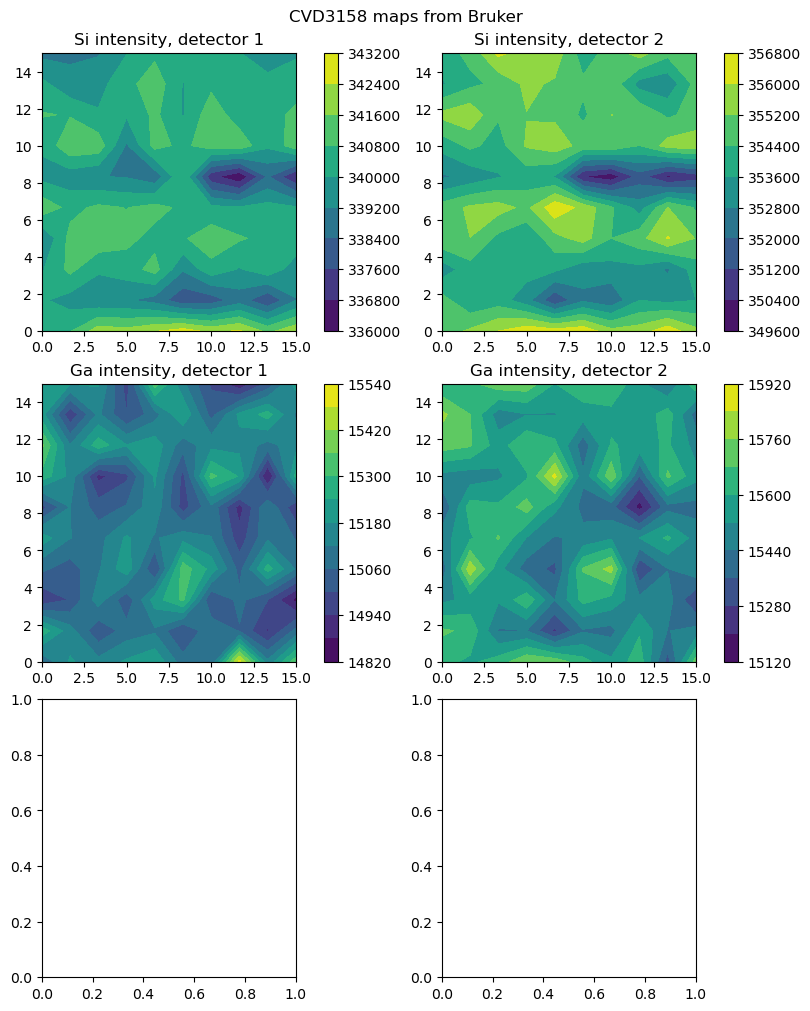

In [6]:
c="viridis"

fg, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), layout="constrained")

def drawMap(a, dat, cm, title):
    """draw contour plot
    dat is array of data to draw
    a is axes on which to draw it
    cm is the color map to use
    title is the title to write
    """
    im_pointer = a.contourf(dat, levels = 10, extent = [0, 15, 0, 15], cmap = cm)
    plt.colorbar(im_pointer, ax=a)
    a.set_title(title)

drawMap(ax1, dat_si_d1, c, "Si intensity, detector 1")
drawMap(ax2, dat_si_d2, c, "Si intensity, detector 2")

drawMap(ax3, dat_ga_d1, c, "Ga intensity, detector 1")
drawMap(ax4, dat_ga_d2, c, "Ga intensity, detector 2")

fg.suptitle(sample_name + " maps from " + source)
#plt.show()

plt.savefig("./" + path_label + "_map/results_out/" + path_label + "_intensity_map_" + source + ".png",
            dpi="figure",
            format="png")

#for contourf(), [0][0] is displayed in the bottom left, [0][9] is in the bottom right
#for imshow(), [0][0] is displayed in the top left, [0][9] is in the top right